In [157]:
%matplotlib inline
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [158]:
# CONFIGURATION
dpi = 100
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_palette(sns.color_palette("hls", 8))
# sns.set_palette(sns.color_palette("GnBu_r", 8))

lines = itertools.cycle((':', '-', '--'))
marker = itertools.cycle((' ', 'o', 'v', '>', 's', '*',
                          '^', '<', ',', '.', 'p', '*', 'h', 'H',
                          'D', 'd'))

data = []
data_p10 = []
labels = []
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.set_palette(sns.color_palette(flatui))

In [159]:
## MOST POPULAR
#validation_false = [0.223414622866268,0.233416459454861,0.214731664151273,0.196115269609526,0.206419346845559,0.199609473369313,0.218256882532309,0.229265053350069]
#validation_true  = [0.232802580333363,0.24201726044278,0.223992676765956,0.204072619924151,0.214462303606688,0.212275355096333,0.232314400507899,0.240337440684993]
mp_false       = [0.230378400525501,0.213113888009112,0.19725237467359,0.208340264780134,0.203068184685922,0.217658217020728,0.2237482440555,0.226733798011832]
mp_false_p10   = [0.0369, 0.0336, 0.0317, 0.0319, 0.0321, 0.0339, 0.0347, 0.0354]
mp_true        = [0.239515510413038,0.222768588865401,0.205898746909652,0.215534064874599,0.214208621546119,0.230353676092785,0.237086946966667,0.237244856543283]
mp_true_p10    = [0.0381, 0.0349, 0.0330, 0.0336, 0.0336, 0.0355, 0.0364, 0.0369]

data_p10.append(mp_false_p10)
data_p10.append(mp_true_p10)

data.append(mp_false)
labels.append("MP")
data.append(mp_true)
labels.append("MP-U")

# flatui = ["#4b4b9e", "#4b4b9e", "#616133", "#616133"]
# sns.set_palette(sns.color_palette(flatui))

In [160]:
## BPRMF
# Latent Factors = 100, Learn Rate = 0.1, Regularization = 0.03
bprmf = [0.229958703612426,0.214410300872542,0.194824926101693,0.210424998166106,0.205122879374277,0.218655802281358,0.223473595982361,0.225851664261406]
bprmf_p10 = [ 0.0370, 0.0339, 0.0317, 0.0331, 0.0325, 0.0345, 0.0359, 0.0365]
data.append(bprmf)
data_p10.append(bprmf_p10)
labels.append("BPRMF")

In [161]:
## WRMF
# Latent Factors = 5, Regularization = 0.1, Alpha = 1
wrmf = [0.0883681163887642,0.0829203386399526,0.085895116952457,0.0845923105286885,0.0899334488203808,0.0841766490635937,0.0913412349672968,0.0813954521901174]
wrmf_p10 = [0.0162, 0.0153, 0.0160, 0.0155, 0.0165, 0.0157, 0.0167, 0.0158]
data.append(wrmf)
data_p10.append(wrmf_p10)
labels.append("WRMF")

In [162]:
## WBPRMF
# Latent Factors = 1000, Learn Rate = 0.1, Regularization = 0.1
wbprmf = [0.123025692179782, 0.11494881927483, 0.101968829104237, 0.103721709276035, 0.100423030155185, 0.0959191249046092, 0.107199299323315, 0.102529559306893]
wbprmf_p10 = [0.0224, 0.0210, 0.0185, 0.0192, 0.0186, 0.0187, 0.0207, 0.0187]
data.append(wbprmf)
data_p10.append(wbprmf_p10)
labels.append("WBPRMF")

In [163]:
## UserKNN
# K = 500
userknn = [0.0682082384349568, 0.0618500646898179, 0.066619353009498, 0.068417318630477, 0.0675110689353663, 0.0662935268485221, 0.0733333996963661, 0.0600398414559912] 
userknn_p10 = [0.0126, 0.0117, 0.0123, 0.0122, 0.0124, 0.0128, 0.0141, 0.0124]
data.append(userknn)
data_p10.append(userknn_p10)
labels.append("UserKNN")

In [164]:
## ItemKNN
# K = 1000
# rerun 1, 6
itemknn = [0.0526245175627986, 0.0510726377374777, 0.0507792039809282, 0.0533509218783963, 0.0574455757515791, 0.054696488714726, 0.0620759653906056, 0.0535987436081144] 
itemknn_p10 = [0.0111, 0.0107, 0.0108, 0.0109, 0.0113, 0.0118, 0.0129, 0.0118]
data.append(itemknn)
labels.append("ItemKNN")
data_p10.append(itemknn_p10)

In [165]:
rankgeofm = [0]
rankgeofm_p10 = 0

In [166]:
# DATA TO PLOT
y = range(1,9)
x = range(1,9)

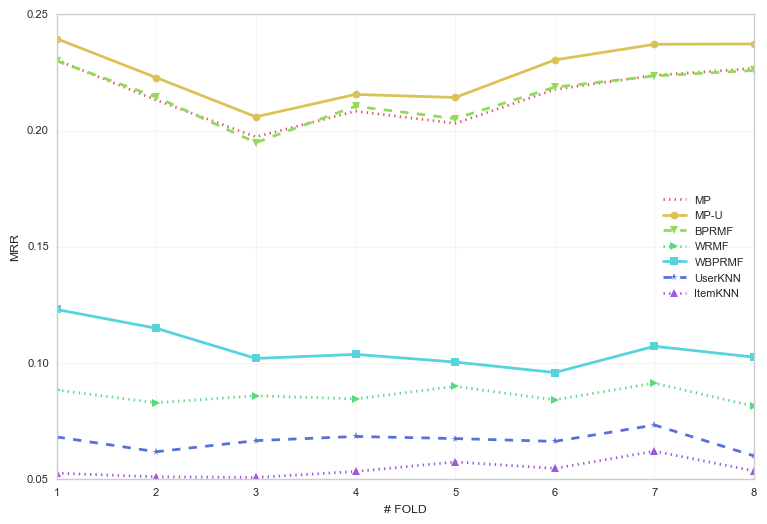

In [167]:
# PLOT
title = 'Baselines'
fig1 = plt.figure(figsize=(9,6))

for i in range(0, len(data)):
    plt.plot(range(0, len(data[i])), data[i], label=labels[i], marker=next(marker), linestyle=next(lines), linewidth=2.0)

# Axes
plt.ylabel('MRR')
plt.xlabel('# FOLD')
plt.xticks(range(0, len(x)), x)

axes = plt.gca()
# axes.set_ylim([0,0.033])
axes.set_xlim([0,7])

# Legend
# plt_legend = plt.legend(loc='lower right', shadow=True)
plt_legend = plt.legend(loc='best', shadow=True)
frame = plt_legend.get_frame()
frame.set_facecolor('0.9')

# Showing
plt.grid(True, alpha=0.2)
# plt.title(title)
plt.show()

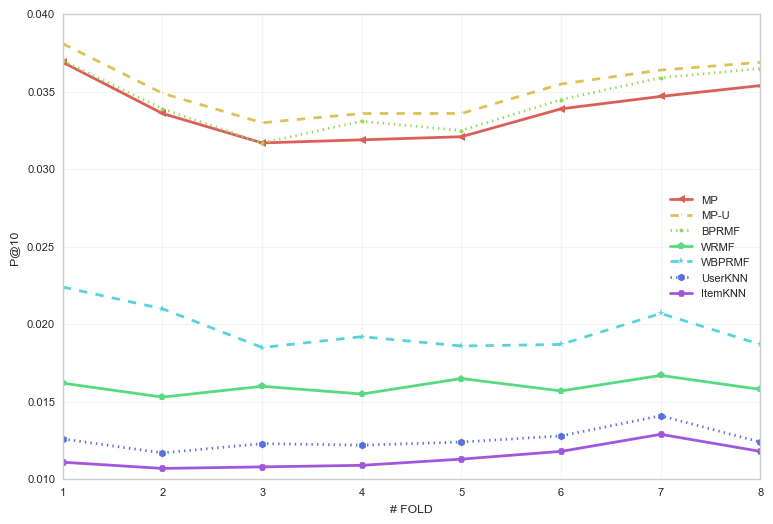

In [168]:
# PLOT
title = 'Baselines'
fig2 = plt.figure(figsize=(9,6))

for i in range(0, len(data_p10)):
    plt.plot(range(0, len(data_p10[i])), data_p10[i], label=labels[i], marker=next(marker), linestyle=next(lines), linewidth=2.0)

# Axes
plt.ylabel('P@10')
plt.xlabel('# FOLD')
plt.xticks(range(0, len(x)), x)

axes = plt.gca()
# axes.set_ylim([0,0.033])
axes.set_xlim([0,7])

# Legend
# plt_legend = plt.legend(loc='lower right', shadow=True)
plt_legend = plt.legend(loc='best', shadow=True)
frame = plt_legend.get_frame()
frame.set_facecolor('0.9')

# Showing
plt.grid(True, alpha=0.2)
# plt.title(title)
plt.show()

In [169]:
from ipywidgets import *
import pandas as pd
df = pd.DataFrame({
                    ""      : [ "Most Popular", "Most Popular Unique", "BPRMF", "WRMF", "WBPRMF", "ItemKNN", "UserKNN", "RankGeo-FM" ],
                    "MRR"   : [ np.mean(mp_false), np.mean(mp_true), np.mean(bprmf), np.mean(wrmf), np.mean(wbprmf), np.mean(itemknn), np.mean(userknn), np.mean(rankgeofm)],
                    "P@10"  : [ np.mean(mp_false_p10), np.mean(mp_true_p10), np.mean(bprmf_p10), np.mean(wrmf_p10), np.mean(wbprmf_p10), np.mean(itemknn_p10), np.mean(userknn_p10), np.mean(rankgeofm_p10)]
                    })
df

,,MRR,P@10
0,Most Popular,0.215037,0.033775
1,Most Popular Unique,0.225326,0.035250
2,BPRMF,0.215340,0.034388
3,WRMF,0.086078,0.015963
4,WBPRMF,0.106217,0.019725
5,ItemKNN,0.054456,0.011412
6,UserKNN,0.066534,0.012563
7,RankGeo-FM,0.000000,0.000000


In [170]:
# GENERATE PDF
title = "baselines-mrr"
pp = PdfPages('../output/nyc/trec/%s.pdf' % title)
pp.savefig(fig1, dpi=200)
pp.close()
plt.close()

title = "baselines-p10"
pp = PdfPages('../output/nyc/trec/%s.pdf' % title)
pp.savefig(fig2, dpi=200)
pp.close()
plt.close()


print("Saved")

Saved
